## Importing libraries

In [2]:
%pip install powerlaw

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw
from scipy.stats import lognorm

Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [3]:
df = pd.read_csv('All Industry All years .csv')
df.head(10)

,Innovation_Timeline(Industry_-_Publication_Date),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,COMMUNICATION EQUIPMENT,81.0,64.0,65.0,31.0,33.0,50.0,48.0,64.0,68.0,...,15150,7510,7053,11093,13917,16306,16644,29581,42411,9222
1,BASIC PHARMACEUTICAL PRODUCTS AND PHARMACEUTIC...,189.0,154.0,187.0,102.0,255.0,113.0,137.0,322.0,175.0,...,13583,7590,6993,8891,9745,11352,11294,16182,21200,3986
2,"BASIC CHEMICALS, FERTILISERS, NITROGEN COMPOUN...",543.0,565.0,549.0,277.0,323.0,303.0,258.0,525.0,398.0,...,10715,5756,5515,7259,8669,9741,7369,11502,14544,2904
3,COMPUTERS AND PERIPHERAL EQUIPMENT,58.0,45.0,38.0,23.0,9.0,21.0,21.0,47.0,19.0,...,9152,3954,3492,4805,6185,9082,7755,17723,30018,6922
4,OTHER GENERAL PURPOSE MACHINERY,318.0,296.0,278.0,135.0,121.0,124.0,77.0,179.0,149.0,...,8636,3949,3761,5401,8014,10228,6850,14635,19072,2914
5,MEDICAL AND DENTAL INSTRUMENTS AND SUPPLIES,75.0,73.0,88.0,67.0,70.0,47.0,39.0,98.0,114.0,...,7201,3508,3310,4439,5979,8392,7178,13835,22002,4079
6,"MEASURING, TESTING AND NAVIGATION INSTRUMENTS;...",140.0,151.0,119.0,51.0,63.0,47.0,48.0,90.0,65.0,...,6810,2808,2548,3663,5188,7271,5617,11623,16841,3280
7,OTHER SPECIAL PURPOSE MACHINERY,370.0,381.0,321.0,183.0,188.0,188.0,146.0,307.0,293.0,...,6324,2729,2563,3546,4408,5539,4145,8652,10425,1502
8,GENERAL PURPOSE MACHINERY,219.0,180.0,172.0,95.0,93.0,74.0,70.0,125.0,117.0,...,6175,3350,3378,3927,4556,5617,4202,9738,10517,1603
9,MOTOR VEHICLES,127.0,112.0,86.0,44.0,38.0,46.0,29.0,60.0,70.0,...,5001,2818,2561,3229,4177,5503,4121,9342,10827,1682


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Innovation_Timeline(Industry_-_Publication_Date)  50 non-null     object 
 1   1990                                              48 non-null     float64
 2   1991                                              48 non-null     float64
 3   1992                                              48 non-null     float64
 4   1993                                              47 non-null     float64
 5   1994                                              48 non-null     float64
 6   1995                                              48 non-null     float64
 7   1996                                              48 non-null     float64
 8   1997                                              48 non-null     float64
 9   1998                   

In [5]:
df.isnull()

,Innovation_Timeline(Industry_-_Publication_Date),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Display

In [6]:
print(f"Total number of patents considered: {len(df)}")

Total number of patents considered: 50


### Emperical distribution

In [7]:
# Calculate the total citations across all years for each domain
df['Total'] = df.iloc[:, 1:].sum(axis=1)

# Calculate the cumulative distribution
df['Cumulative Distribution'] = df['Total'].cumsum() / df['Total'].sum()

# Display the updated dataset
df[['Innovation_Timeline(Industry_-_Publication_Date)', 'Total', 'Cumulative Distribution']].head()


,Innovation_Timeline(Industry_-_Publication_Date),Total,Cumulative Distribution
0,COMMUNICATION EQUIPMENT,222536.0,0.119304
1,BASIC PHARMACEUTICAL PRODUCTS AND PHARMACEUTIC...,195342.0,0.224028
2,"BASIC CHEMICALS, FERTILISERS, NITROGEN COMPOUN...",140817.0,0.299521
3,COMPUTERS AND PERIPHERAL EQUIPMENT,128344.0,0.368328
4,OTHER GENERAL PURPOSE MACHINERY,120855.0,0.433119


C:\Users\adith\AppData\Local\Temp\ipykernel_16912\717583413.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


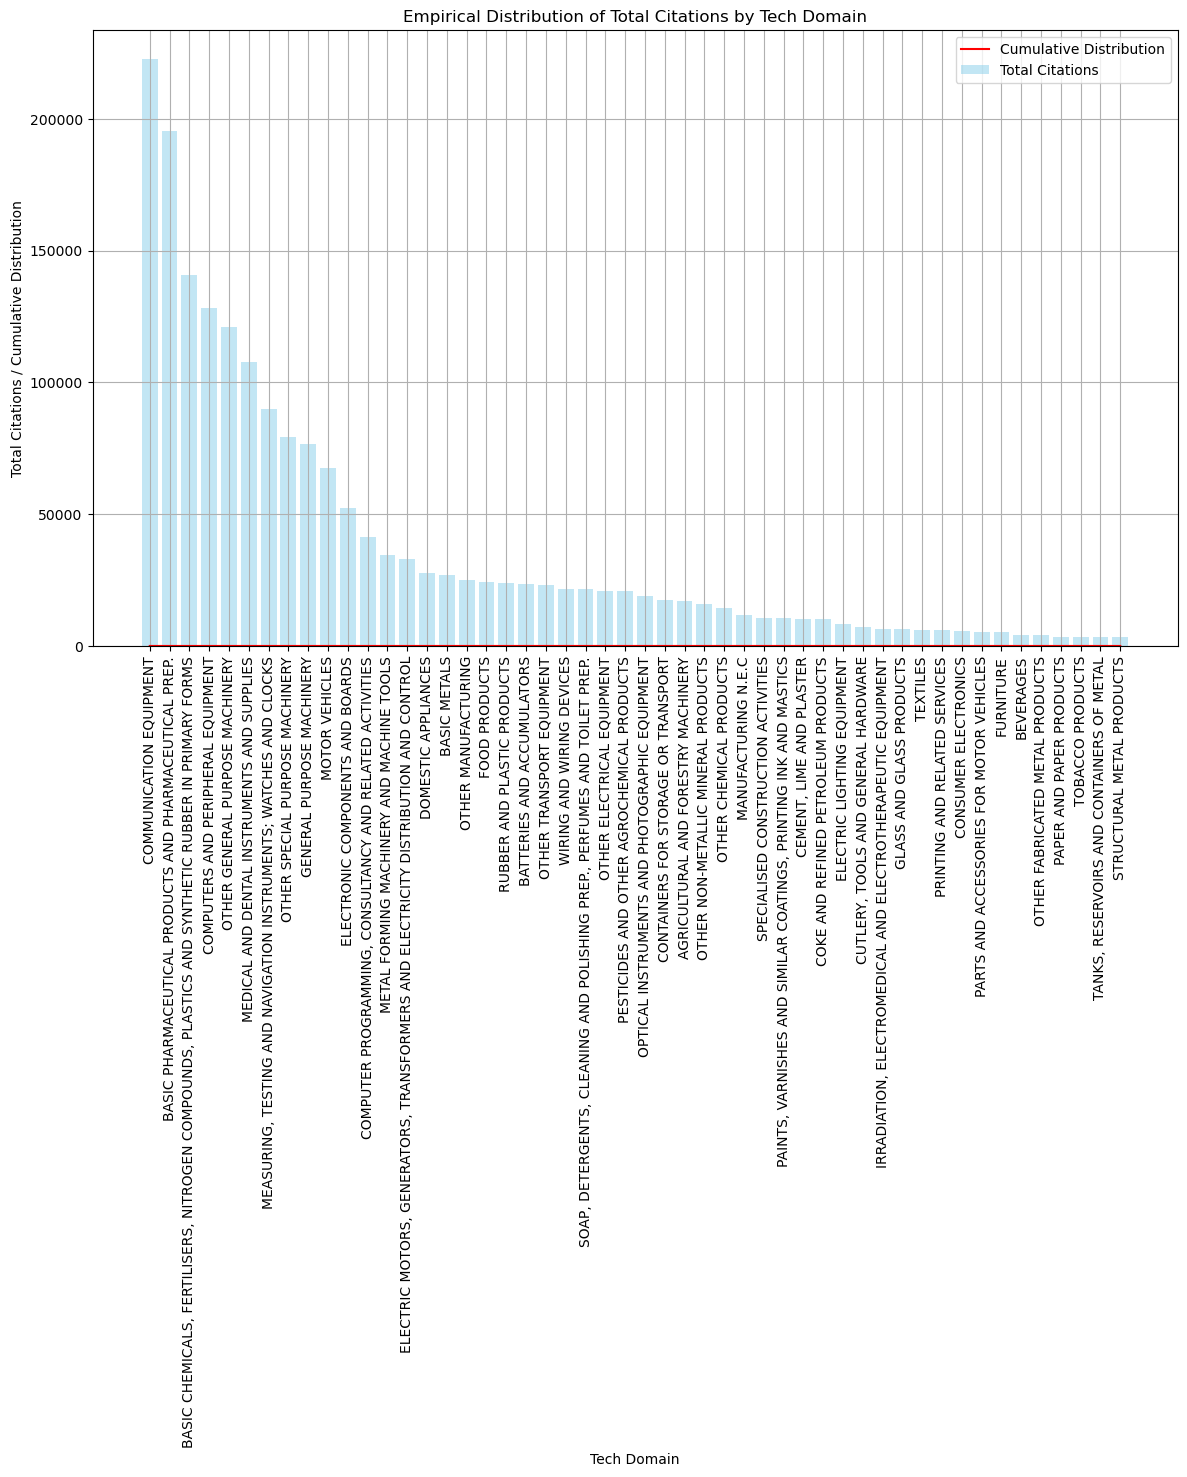

In [8]:
# Plot the empirical distributions for the tech domains
plt.figure(figsize=(14, 8))

# Bar plot for Total citations
plt.bar(df['Innovation_Timeline(Industry_-_Publication_Date)'], 
        df['Total'], alpha=0.5, label='Total Citations', color='skyblue')

# Line plot for Cumulative Distribution
plt.plot(df['Innovation_Timeline(Industry_-_Publication_Date)'], 
         df['Cumulative Distribution'], 'r-', label='Cumulative Distribution')

# Add labels, title, and legend
plt.xlabel('Tech Domain')
plt.ylabel('Total Citations / Cumulative Distribution')
plt.title('Empirical Distribution of Total Citations by Tech Domain')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


### Lognormal fit

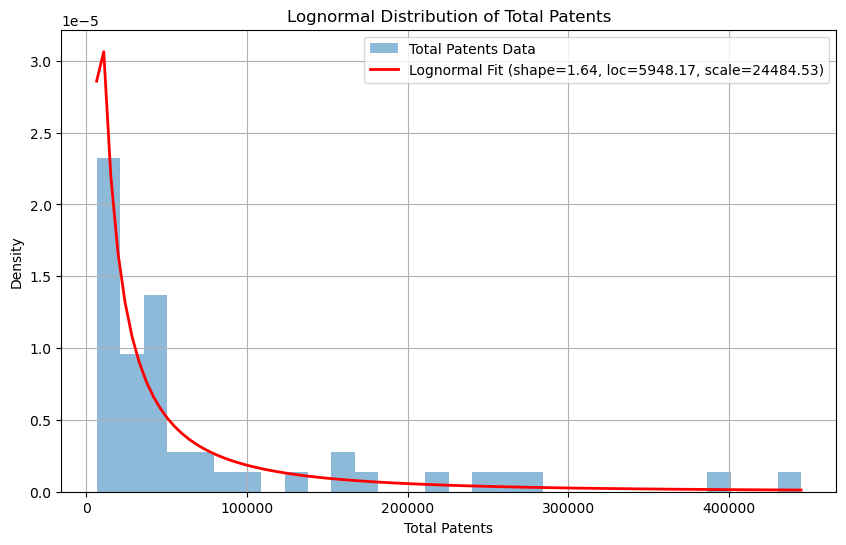

In [9]:
# Calculate the total patents per year for each company
df['Total'] = df.iloc[:, 1:].sum(axis=1)

# Fit a lognormal distribution to the total patents
total_patents = df['Total']
shape, loc, scale = lognorm.fit(total_patents)
x = np.linspace(min(total_patents), max(total_patents), 100)
pdf_fitted = lognorm.pdf(x, shape, loc, scale)

# Plot the lognormal distribution
plt.figure(figsize=(10, 6))
plt.hist(total_patents, bins=30, density=True, alpha=0.5, label='Total Patents Data')
plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'Lognormal Fit (shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f})')
plt.xlabel('Total Patents')
plt.ylabel('Density')
plt.title('Lognormal Distribution of Total Patents')
plt.legend()
plt.grid(True)
plt.show()


### Power law fit

Calculating best minimal value for power law fit


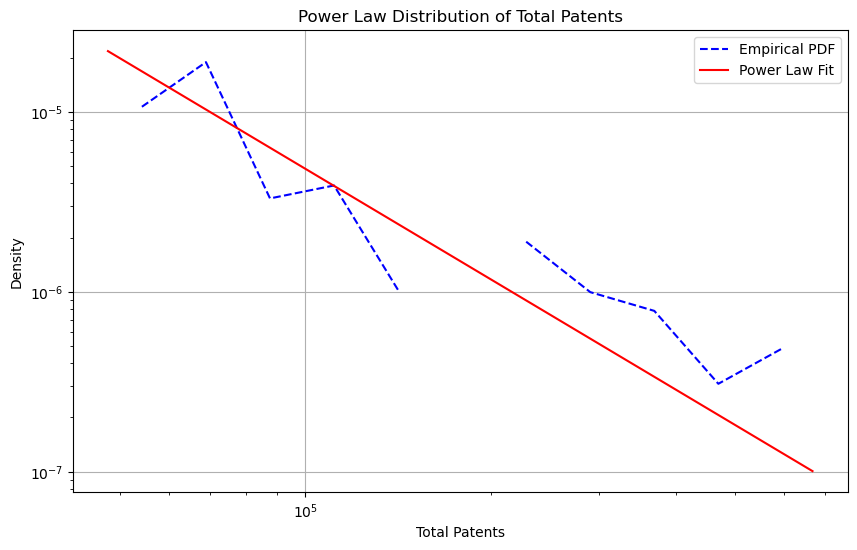

In [10]:
df['Total'] = df.iloc[:, 1:].sum(axis=1)
total_patents = df['Total']

# Fit a power law distribution to the total patents
fit = powerlaw.Fit(total_patents)

# Plot the power law distribution
plt.figure(figsize=(10, 6))
fit.plot_pdf(color='b', linestyle='--', label='Empirical PDF')
fit.power_law.plot_pdf(color='r', label='Power Law Fit')
plt.xlabel('Total Patents')
plt.ylabel('Density')
plt.title('Power Law Distribution of Total Patents')
plt.legend()
plt.grid(True)
plt.show()


### Pareto distribution

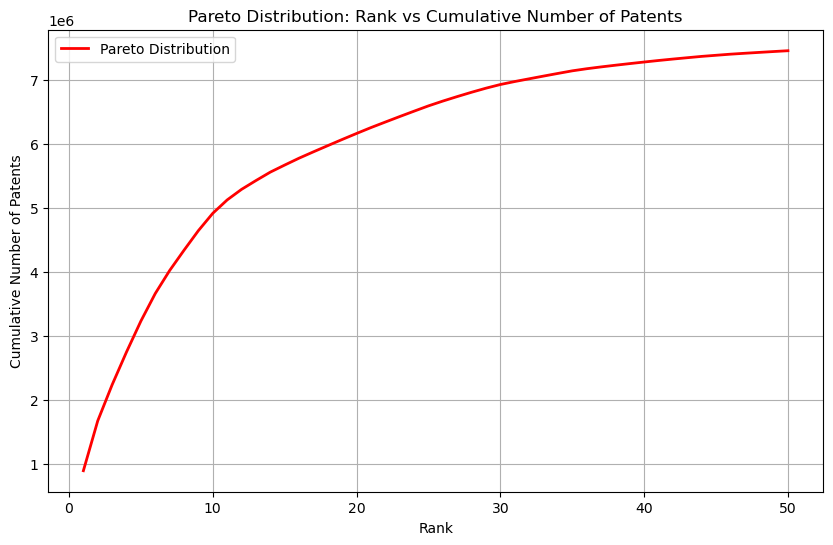

In [11]:
# Calculate the total patents across all years for each industry
df['Total'] = df.iloc[:, 1:].sum(axis=1)

# Sort industries by total patents in descending order
data_sorted = df.sort_values(by='Total', ascending=False)

# Calculate cumulative number of patents
data_sorted['Cumulative Patents'] = data_sorted['Total'].cumsum()

# Add rank column
data_sorted['Rank'] = np.arange(1, len(data_sorted) + 1)

# Pareto distribution: Rank vs Cumulative Patents
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['Rank'], data_sorted['Cumulative Patents'], 'r-', lw=2, label='Pareto Distribution')
plt.xlabel('Rank')
plt.ylabel('Cumulative Number of Patents')
plt.title('Pareto Distribution: Rank vs Cumulative Number of Patents')
plt.legend()
plt.grid(True)
plt.show()
